Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Collecting the dataset

In [2]:
df = pd.read_csv(r"C:\Users\user\Downloads\termdeposit_train.csv")

Exploratory Data Analysis (Non-Graphical)

In [3]:
# Checking the number of rows and columns in the dataset
df.shape

(31647, 18)

In [4]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [5]:
df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [7]:
# Checking the number of values in the column previous outcome
df['poutcome'].value_counts()

poutcome
unknown    25929
failure     3362
other       1288
success     1068
Name: count, dtype: int64

Exploratory Data Analysis (Graphical)

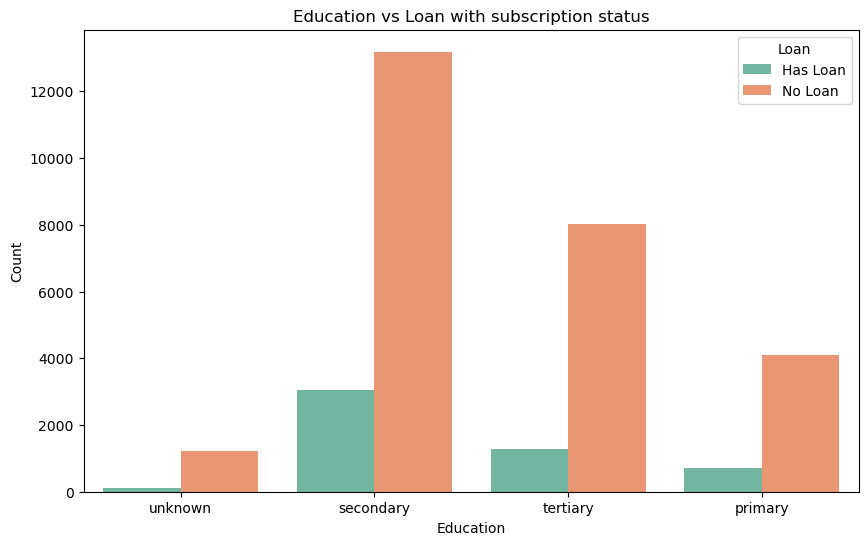

In [8]:
# Plotting Education vs Loan with subscription status
plt.figure(figsize=(10,6))
sns.countplot(data = df, x='education',hue='loan',hue_order=['yes','no'],palette='Set2')
plt.title('Education vs Loan with subscription status')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Loan',loc='upper right',labels=['Has Loan','No Loan'])
plt.show()

People with secondary education has the highest number of loans in the dataset, followed by people with tertiary education.

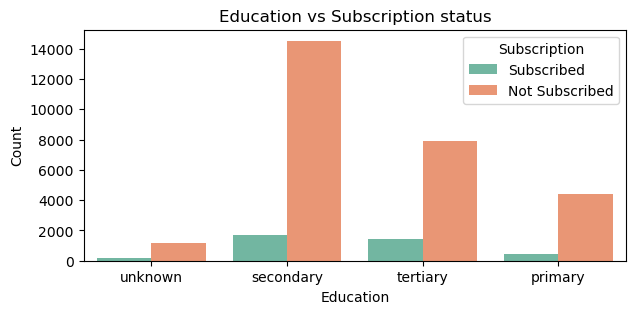

In [9]:
plt.figure(figsize=(7,3))
sns.countplot(data = df, x='education',hue='subscribed',hue_order=['yes','no'],palette='Set2')
plt.title('Education vs Subscription status')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Subscription',loc='upper right',labels=['Subscribed','Not Subscribed'])
plt.show()

The highest number of subscription to term deposit is from people with secondary education and people with tertiary education 

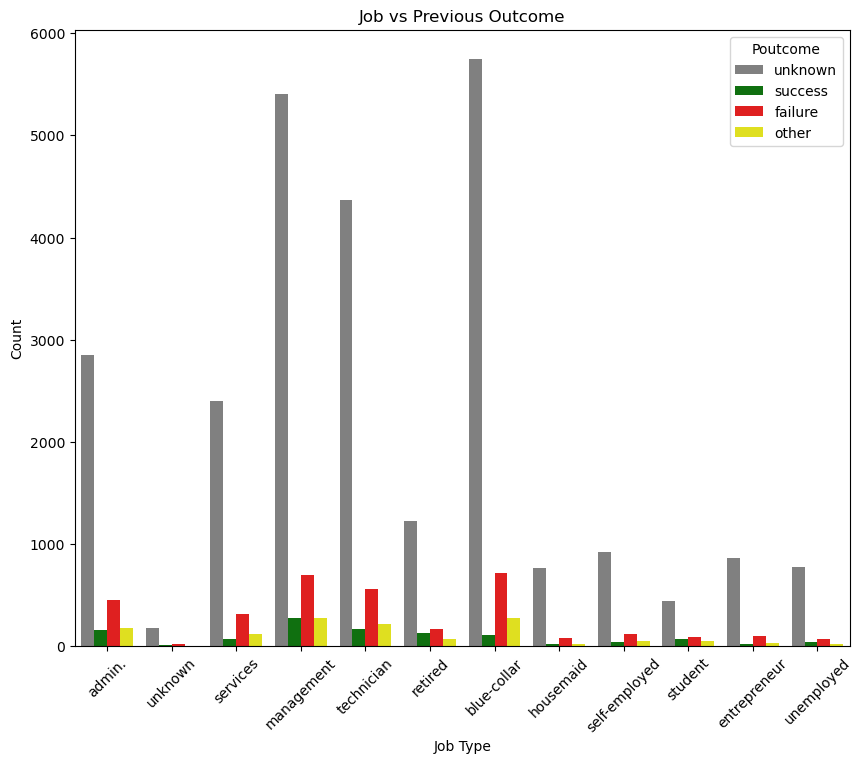

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(data = df, x = 'job', hue='poutcome', palette = {'success':'green','failure':'red','unknown':'gray','other':'yellow'})
plt.title('Job vs Previous Outcome')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.legend(title='Poutcome')
plt.xticks(rotation=45)
plt.show()

The highest number of subscription to term deposit is from management jobs, followed by technician, administration , retired and blue collar while job types like entrepreneur have the lowest rate of subscription to term deposit

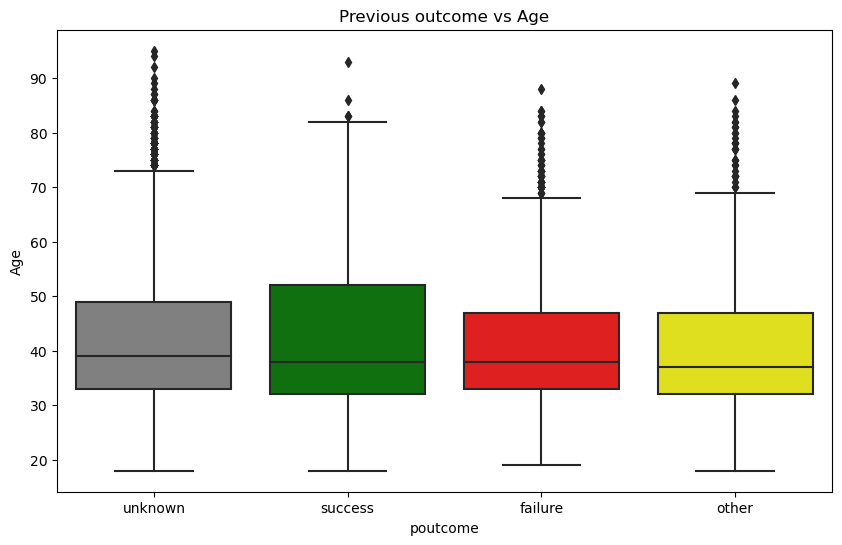

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df, x='poutcome',y='age',palette = {'success':'green','failure':'red','unknown':'gray','other':'yellow'})
plt.title('Previous outcome vs Age')
plt.xlabel('poutcome')
plt.ylabel('Age')
plt.show()

Middle aged people (35-50) are more likely to subscribe to term deposit 

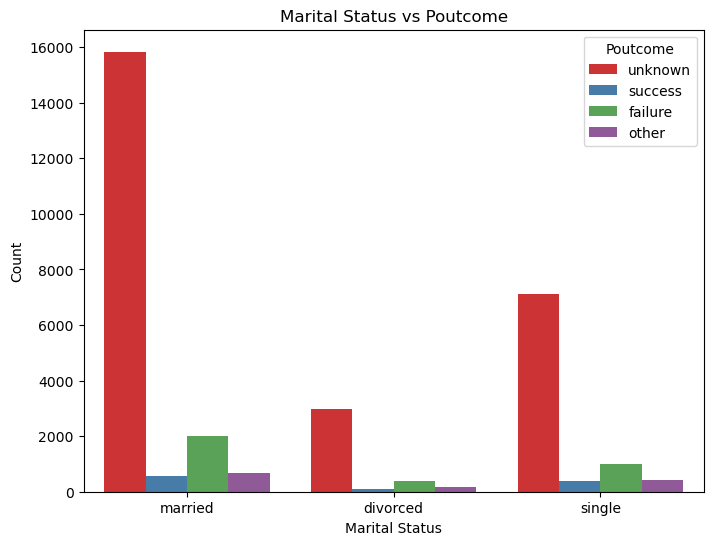

In [12]:
plt.figure(figsize=(8,6))
sns.countplot(data = df, x='marital',hue='poutcome',palette='Set1')
plt.title('Marital Status vs Poutcome')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Poutcome',loc='upper right')
plt.show()

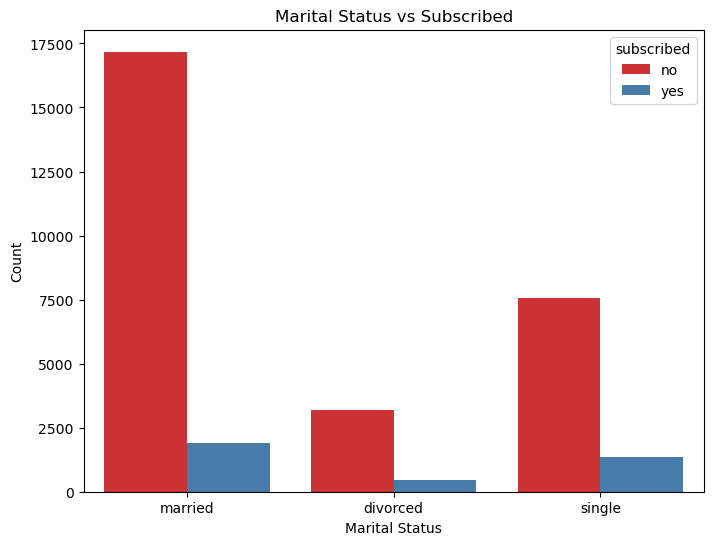

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(data = df, x='marital',hue='subscribed',palette='Set1')
plt.title('Marital Status vs Subscribed')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='subscribed',loc='upper right')
plt.show()

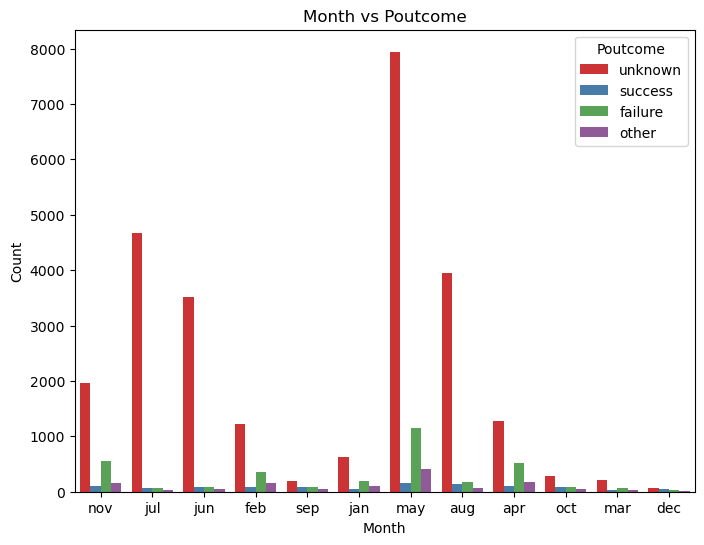

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(data = df, x='month',hue='poutcome',palette='Set1')
plt.title('Month vs Poutcome')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Poutcome',loc='upper right')
plt.show()

The month of may has the highest number of successes in term deposit subscription

In [15]:
# Encoding the categorical variables using Label Encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['job','marital','education','default','housing','loan','contact','month','poutcome','subscribed']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
    
print(df)

          ID  age  job  marital  education  default  balance  housing  loan  \
0      26110   56    0        1          3        0     1933        0     0   
1      40576   31   11        1          1        0        3        0     0   
2      15320   27    7        1          1        0      891        1     0   
3      43962   57    4        0          2        0     3287        0     0   
4      29842   31    9        1          1        0      119        1     0   
...      ...  ...  ...      ...        ...      ...      ...      ...   ...   
31642  36483   29    4        2          2        0        0        1     0   
31643  40178   53    4        0          2        0      380        0     1   
31644  19710   32    4        2          2        0      312        0     0   
31645  38556   57    9        1          1        0      225        1     0   
31646  14156   55    4        0          1        0      204        1     0   

       contact  day  month  duration  campaign  pda

In [16]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,40576,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,15320,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,43962,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,29842,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0


Creating a Model

Logistic Regression

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [45]:
# Splitting the data into test and train
x = df.drop('subscribed',axis=1)
y = df['subscribed']

In [19]:
x_train,x_val,y_train,y_val = train_test_split(x,y, test_size=0.3, random_state=100)

In [20]:
# Applying the standard sclaer for a better distribution (optional but often recommended)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

In [21]:
# Fitting a Logistic Regression algo with the data
model = LogisticRegression(random_state=100)
model.fit(x_train,y_train)

LogisticRegression(random_state=100)

In [22]:
# Predicting the x_val
y_pred = model.predict(x_val)

In [23]:
# Applying evaluation metrics to check how well the model is performing
accuracy = accuracy_score(y_val,y_pred)
conf_mat = confusion_matrix(y_val,y_pred)
class_rep = classification_report(y_val,y_pred)

In [24]:
print(f"Validation Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_mat)
print("Classification Report:\n", class_rep)

Validation Accuracy: 0.90
Confusion Matrix:
 [[8149  190]
 [ 791  365]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      8339
           1       0.66      0.32      0.43      1156

    accuracy                           0.90      9495
   macro avg       0.78      0.65      0.68      9495
weighted avg       0.88      0.90      0.88      9495



Explaining the evaluation metrics
1. The accuracy of the model on the validation dataset is 90%, which mean the model correctly predicted 90% of the samples.

2. Confusion Matrix :- 

    TN(True Negative) - 8149
    
    FP(False Positive) - 190
    
    FN(False Negative) - 791
    
    TP(True Positive) - 365
    
3. Classification Report - 

        Precision(Class 0)- In class 0 91%, out of all the instances were predicted correctly.
        
        Precision(Class 1) - In class 1 66%, among all the instances were predicted correctly.
        
        Recall(Class 0) - 98% of the actual class 0 instances were correctly classified.
        
        Recall(Class 1)- Onlt 32% of the actual class 1 instances were correctly classified.

In [46]:
# Collecting the test data to make predictions
test_data = pd.read_csv(r"C:\Users\user\Downloads\termdeposit_test.csv")

In [26]:
# Encoding the categorical variables 
categorical_columns_test = ['job','marital','education','default','housing','loan','contact','month','poutcome']
for col in categorical_columns_test:
    test_data[col] = label_encoder.fit_transform(test_data[col])
    
print(test_data)

          ID  age  job  marital  education  default  balance  housing  loan  \
0      38441   32    7        1          1        0      118        1     0   
1      40403   78    5        0          0        0     2787        0     0   
2       3709   31    6        2          2        0      144        1     0   
3      37422   57    7        2          0        0     3777        1     0   
4      12527   45    1        0          1        0     -705        0     1   
...      ...  ...  ...      ...        ...      ...      ...      ...   ...   
13559  23465   39    4        1          2        0       45        0     0   
13560  11743   54    1        1          0        0     2281        1     0   
13561  28292   35    5        1          0        0      285        1     0   
13562  45163   29    0        2          1        0      464        0     0   
13563  34839   29    0        1          1        0        2        1     0   

       contact  day  month  duration  campaign  pda

In [27]:
x_test = test_data

In [28]:
x_test = scaler.transform(x_test)

In [29]:
# Making prediction on the test data
test_pred = model.predict(x_test)

In [30]:
test_pred_df = pd.DataFrame({'ID': test_data['ID'], 'Predicted_Subscribed': test_pred})

In [31]:
test_pred_df

,ID,Predicted_Subscribed
0,38441,0
1,40403,0
2,3709,0
3,37422,0
4,12527,0
...,...,...
13559,23465,0
13560,11743,0
13561,28292,0
13562,45163,0


Creating a Different Model

Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
model = RandomForestClassifier(n_estimators = 100, random_state=100)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=100)

In [34]:
y_pred = model.predict(x_val)

In [35]:
accuracy = accuracy_score(y_val,y_pred)
conf_mat = confusion_matrix(y_val,y_pred)
class_rep = classification_report(y_val,y_pred)

In [36]:
print(f"Validation Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_mat)
print("Classification Report:\n", class_rep)

Validation Accuracy: 0.91
Confusion Matrix:
 [[8031  308]
 [ 589  567]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      8339
           1       0.65      0.49      0.56      1156

    accuracy                           0.91      9495
   macro avg       0.79      0.73      0.75      9495
weighted avg       0.90      0.91      0.90      9495



Explaining the evaluation metrics
1. The accuracy of the model on the validation dataset is 91%, which mean the model correctly predicted 90% of the samples.

2. Confusion Matrix :- 

    TN(True Negative) - 8031
    
    FP(False Positive) - 308
    
    FN(False Negative) - 580
    
    TP(True Positive) - 567
    
3. Classification Report - 

        Precision(Class 0)- In class 0 93%, out of all the instances were predicted correctly.
        
        Precision(Class 1) - In class 1 65%, among all the instances were predicted correctly.
        
        Recall(Class 0) - 96% of the actual class 0 instances were correctly classified.
        
        Recall(Class 1)- Onlt 49% of the actual class 1 instances were correctly classified.

In [37]:
test_pred = model.predict(x_test)

In [38]:
test_pred_df = pd.DataFrame({'ID': test_data['ID'],'Predicted_Subscribed': test_pred})

In [39]:
test_pred_df

,ID,Predicted_Subscribed
0,38441,0
1,40403,0
2,3709,0
3,37422,0
4,12527,0
...,...,...
13559,23465,0
13560,11743,0
13561,28292,0
13562,45163,1


Creating a third model

Support Vector Classifier

In [40]:
from sklearn.svm import SVC

In [41]:
model = SVC(kernel='linear',random_state=100)
model.fit(x_train,y_train)

SVC(kernel='linear', random_state=100)

In [42]:
y_pred = model.predict(x_val)

In [43]:
accuracy = accuracy_score(y_val,y_pred)
conf_mat = confusion_matrix(y_val,y_pred)
class_rep = classification_report(y_val,y_pred)

In [44]:
print(f"Validation Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_mat)
print("Classification Report:\n", class_rep)

Validation Accuracy: 0.89
Confusion Matrix:
 [[8252   87]
 [ 997  159]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      8339
           1       0.65      0.14      0.23      1156

    accuracy                           0.89      9495
   macro avg       0.77      0.56      0.58      9495
weighted avg       0.86      0.89      0.85      9495



Conclusion - Out of the 3 models the Random Forest Classifier gives us the best accuracy which is 91% followed by Logistic Regression 90% and the lest accuracy is given to us by Support Vector which is 89%. Though there is not a significant difference in accuracy amongst the 3 models but Random Forest still gives us the best results.